### Imports

In [1]:
import stl as stl
stl.MAX_COUNT = 1e15 # larg

### Load stl from file

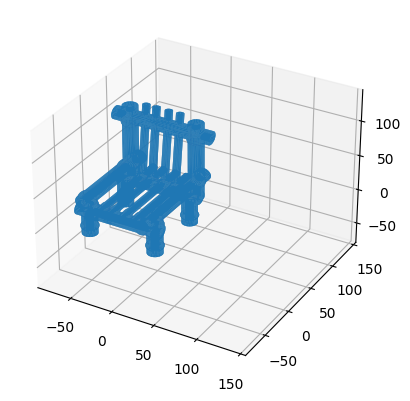

In [2]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('/data/csc4801/KedzioraLab/downloads_chairs/stls/Bamboo_Chair/Bamboo_Chair.stl')

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Vertices and faces to stl fil emethod

In [3]:
import numpy as np
from stl import mesh, Mode
from mpl_toolkits import mplot3d
import matplotlib.pyplot as pyplot

def make_shape(name, vertices, faces):
    cube_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

    # i is index of each face
    # j is the vertex index for the face
    for i, face in enumerate(faces):
        for j in range(3): 
            cube_mesh.vectors[i][j] = vertices[face[j]] 

    # plot
    figure = pyplot.figure()
    axes = figure.add_subplot(projection='3d')
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(cube_mesh.vectors))
    axes.auto_scale_xyz(cube_mesh.x.flatten(), cube_mesh.y.flatten(), cube_mesh.z.flatten())
    pyplot.show()

    # save
    cube_mesh.save("{}.stl".format(name), mode=Mode.BINARY)
    cube_mesh.save("{}_but_ascii.stl".format(name), mode=Mode.ASCII)

### Cube demo

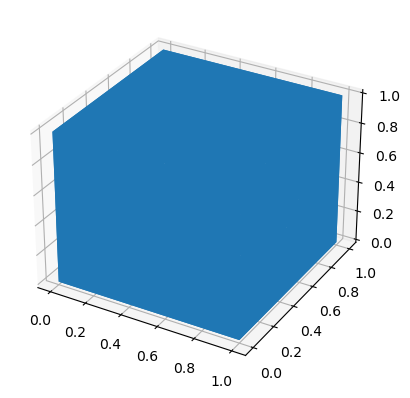

In [4]:
# epic cube

vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
])

# array of vertex indices for each face
faces = np.array([
    [0, 3, 2],
    [0, 2, 1],
    [4, 5, 6],
    [4, 6, 7],
    [0, 4, 7],
    [0, 7, 3],
    [1, 2, 6],
    [1, 6, 5],
    [0, 1, 5],
    [0, 5, 4],
    [2, 3, 7],
    [2, 7, 6],
])

make_shape("epic_cube", vertices, faces)

### Parse and convert stl file

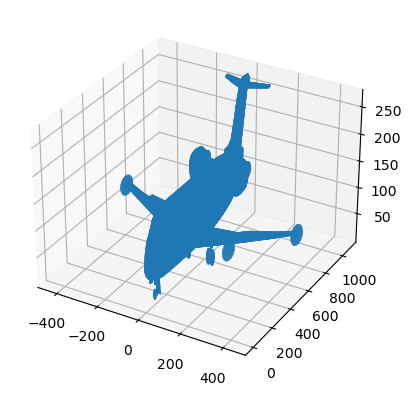

In [5]:
# Load off file convert to stl

def load_off(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # metadata stuff (third val isnt used?)
    num_vertices, num_faces, _ = map(int, lines[1].split())

    # vertices
    vertices = []
    for line in lines[2:num_vertices+2]:
        vertex = list(map(float, line.split()))
        vertices.append(vertex)
    vertices = np.array(vertices)

    # faces
    faces = []
    for line in lines[num_vertices+2:]:
        face = list(map(int, line.split()[1:]))  # ignore first value which is # of vertices on the face
        faces.append(face)
    faces = np.array(faces)

    return vertices, faces

v, f = load_off("test.off")

make_shape("off_test", v, f)